In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

In [35]:
tickers = ['TCS.BO','RELIANCE.BO','SBIN.BO', 'SUZLON.NS','ACC.NS','AUROPHARMA.NS','BSOFT.NS','NBCC.NS','VBL.NS']
data = yf.download(tickers, start = '2019-01-01', end = '2023-01-01')['Adj Close']

[*********************100%%**********************]  9 of 9 completed


In [36]:
data

Ticker,ACC.NS,AUROPHARMA.NS,BSOFT.NS,NBCC.NS,RELIANCE.BO,SBIN.BO,SUZLON.NS,TCS.BO,VBL.NS
Date,,,,,,,,,
2019-01-01,1382.721558,705.565369,123.030952,35.166302,1096.508423,279.200409,5.004266,1682.217163,46.809258
2019-01-02,1378.217163,697.096313,122.435898,35.472092,1081.791870,274.070618,4.912444,1700.610352,45.678135
2019-01-03,1348.775879,688.964355,119.942436,35.594414,1067.564087,271.459076,4.866534,1676.999878,45.965225
2019-01-04,1364.425171,698.539856,119.262398,36.022530,1074.702515,277.474915,5.004266,1657.103882,46.355656
2019-01-07,1372.644775,697.481262,117.845642,37.337440,1079.004761,275.796112,4.912444,1677.177124,46.605419
...,...,...,...,...,...,...,...,...,...
2022-12-26,2404.472900,432.548828,286.395691,23.891436,2507.103516,575.719849,9.800000,3113.738525,268.126068
2022-12-27,2458.393066,437.000977,291.845734,24.381014,2527.511963,580.640076,10.200000,3116.799072,261.426392
2022-12-28,2435.922607,435.516937,288.114136,24.707401,2526.915771,580.013000,10.050000,3114.168945,262.328278


In [37]:
Ret = expected_returns.mean_historical_return(data)
Cov = risk_models.sample_cov(data)

In [38]:
Ret

Ticker
ACC.NS           0.153565
AUROPHARMA.NS   -0.116652
BSOFT.NS         0.247849
NBCC.NS         -0.080224
RELIANCE.BO      0.237511
SBIN.BO          0.210856
SUZLON.NS        0.210757
TCS.BO           0.170172
VBL.NS           0.551129
dtype: float64

In [39]:
Cov

Ticker,ACC.NS,AUROPHARMA.NS,BSOFT.NS,NBCC.NS,RELIANCE.BO,SBIN.BO,SUZLON.NS,TCS.BO,VBL.NS
Ticker,,,,,,,,,
ACC.NS,0.092750,0.041417,0.049321,0.060861,0.032293,0.049521,0.039039,0.023134,0.028415
AUROPHARMA.NS,0.041417,0.181372,0.057374,0.061121,0.038712,0.048678,0.032038,0.031033,0.014873
BSOFT.NS,0.049321,0.057374,0.251042,0.073648,0.047093,0.058628,0.046149,0.049951,0.034645
NBCC.NS,0.060861,0.061121,0.073648,0.257734,0.053517,0.083741,0.102082,0.029891,0.037579
RELIANCE.BO,0.032293,0.038712,0.047093,0.053517,0.107754,0.046495,0.030251,0.032254,0.018911
SBIN.BO,0.049521,0.048678,0.058628,0.083741,0.046495,0.132645,0.040216,0.024650,0.027429
SUZLON.NS,0.039039,0.032038,0.046149,0.102082,0.030251,0.040216,0.515951,0.007223,0.029463
TCS.BO,0.023134,0.031033,0.049951,0.029891,0.032254,0.024650,0.007223,0.068700,0.008153
VBL.NS,0.028415,0.014873,0.034645,0.037579,0.018911,0.027429,0.029463,0.008153,0.154325


In [40]:
ef = EfficientFrontier(Ret,Cov)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print("Optimal Weights:", cleaned_weights)

Optimal Weights: OrderedDict([('ACC.NS', 0.0), ('AUROPHARMA.NS', 0.0), ('BSOFT.NS', 0.0), ('NBCC.NS', 0.0), ('RELIANCE.BO', 0.17008), ('SBIN.BO', 0.02922), ('SUZLON.NS', 0.01723), ('TCS.BO', 0.22328), ('VBL.NS', 0.56019)])


In [69]:
performance = ef.portfolio_performance(verbose = True)

Expected annual return: 55.1%
Annual volatility: 39.3%
Sharpe Ratio: 1.35


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

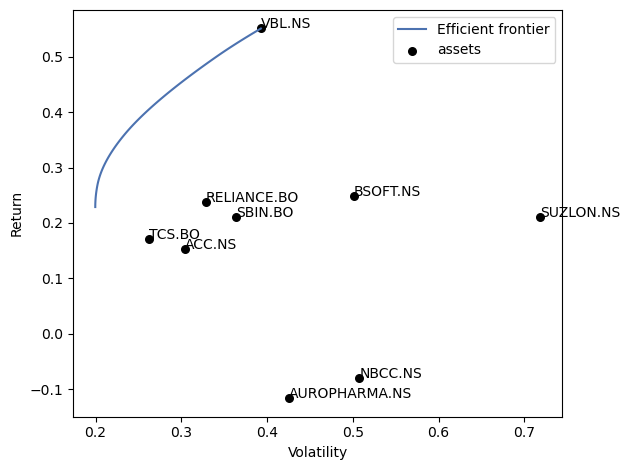

In [70]:
ef = EfficientFrontier(Ret, Cov, weight_bounds=(0,1))
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_tickers = True)

In [71]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(Ret)), n_samples)
Returns = w.dot(Ret)
Risks = np.sqrt(np.diag(w @ Cov @ w.T))
sharpe_ratios = Returns / Risks

In [72]:
sharpe_ratios

array([0.38362672, 0.41842625, 0.45173987, ..., 0.51732309, 0.88623894,
       0.35739287])

In [73]:
from matplotlib.colors import Normalize

In [74]:
norm = Normalize(vmin=min(sharpe_ratios), vmax=max(sharpe_ratios))

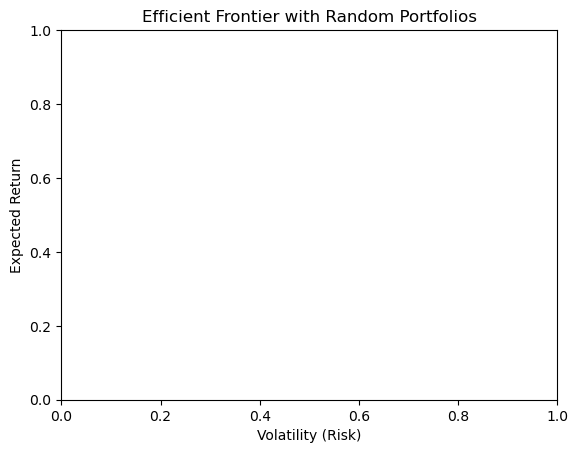

In [76]:
scatter = ax.scatter(Risks, Returns, marker='.', c=sharpe_ratios, cmap='viridis', norm=norm)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Sharpe Ratio')
performance = ef.portfolio_performance()
ax.scatter(performance[1], performance[0], marker='*', color='r', s=100, label='Max Sharpe')
plt.title('Efficient Frontier with Random Portfolios')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.show()